In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 cd "/content/drive/MyDrive/ML and DM /prj/pro customer"

/content/drive/MyDrive/ML and DM /prj/pro customer


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import library

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Import Dataset**

Read dataset

In [ ]:
data_train = pd.read_csv('Train.csv', low_memory =False)
data_test = pd.read_csv('Test.csv', low_memory =False)
data = pd.concat([data_train, data_test], axis=0)

In [ ]:
data.shape

(10695, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


#### print unique data

In [ ]:
for value in data:
    print('For {},{} unique values'.format(value,data[value].nunique()))

For ID,8363 unique values
For Gender,2 unique values
For Ever_Married,2 unique values
For Age,67 unique values
For Graduated,2 unique values
For Profession,9 unique values
For Work_Experience,15 unique values
For Spending_Score,3 unique values
For Family_Size,9 unique values
For Var_1,7 unique values
For Segmentation,4 unique values


In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values: {column}: {unique_values}")

Unique values: ID: [462809 462643 466315 ... 467938 467960 467968]
Unique values: Gender: ['Male' 'Female']
Unique values: Ever_Married: ['No' 'Yes' nan]
Unique values: Age: [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Unique values: Graduated: ['No' 'Yes' nan]
Unique values: Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Unique values: Work_Experience: [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Unique values: Spending_Score: ['Low' 'Average' 'High']
Unique values: Family_Size: [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
Unique values: Var_1: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Unique values: Segmentation: ['D' 'A' 'B' 'C']


In [ ]:
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [ ]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Count values of label

In [ ]:
data['Segmentation'].value_counts()

D    3027
A    2818
C    2442
B    2408
Name: Segmentation, dtype: int64

# Delete duplicate value

In [ ]:
data = data.drop_duplicates()


# Sum of null data

In [ ]:
data.isna().sum()

ID                    0
Gender                0
Ever_Married        189
Age                   0
Graduated           100
Profession          162
Work_Experience    1090
Spending_Score        0
Family_Size         447
Var_1               108
Segmentation          0
dtype: int64

# **Data visualization**

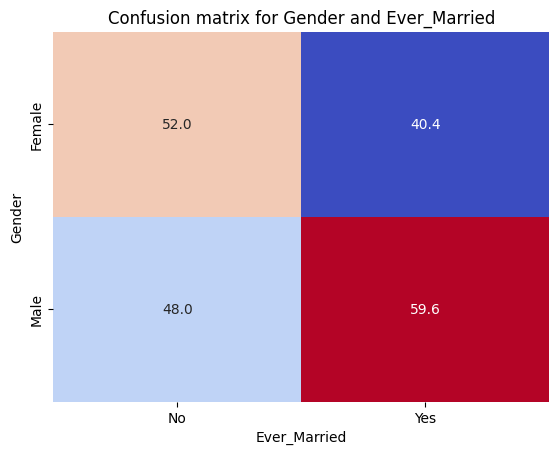

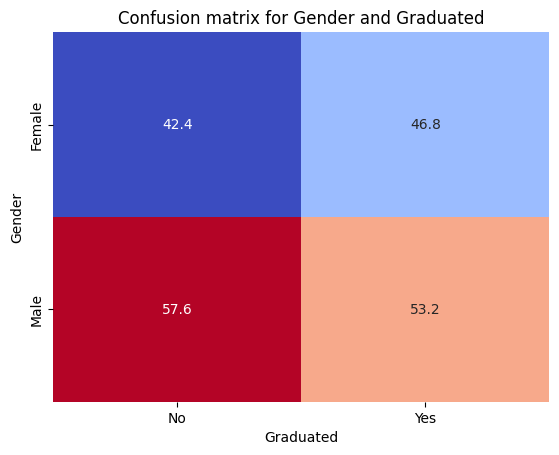

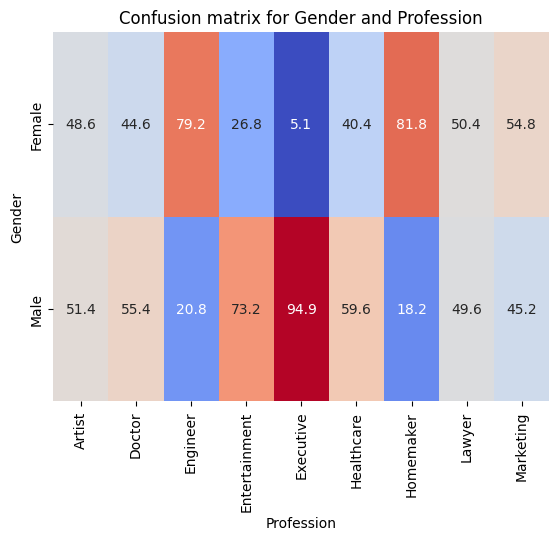

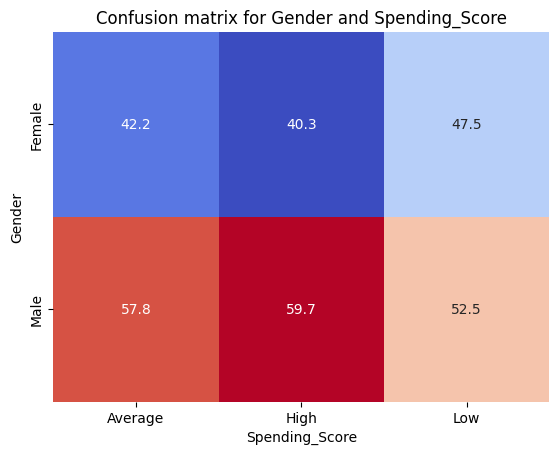

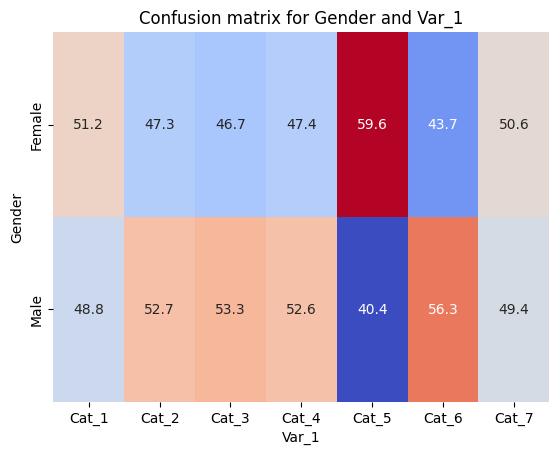

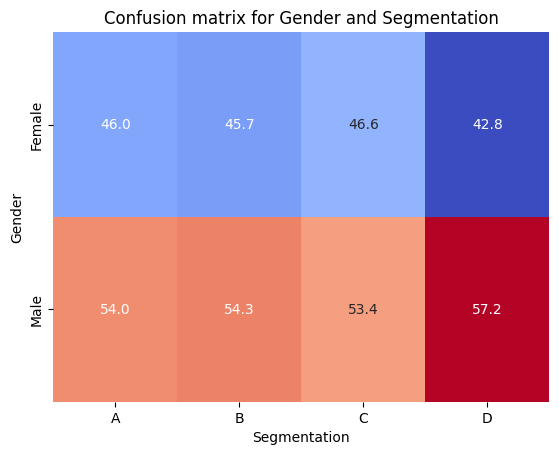

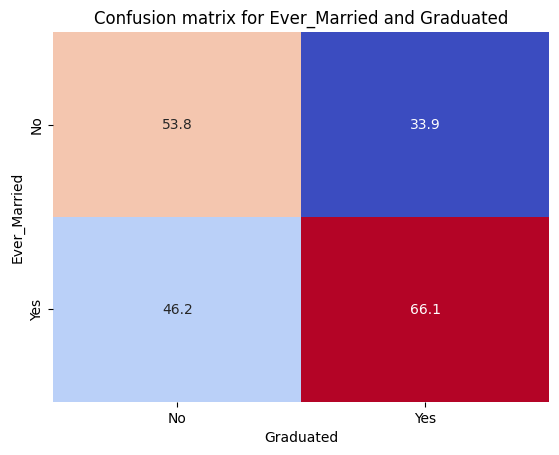

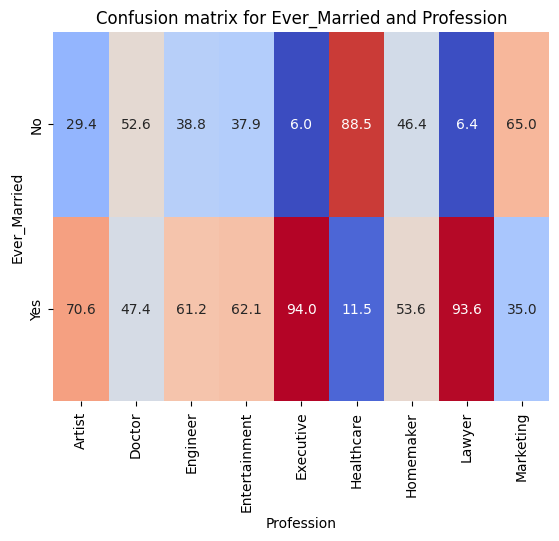

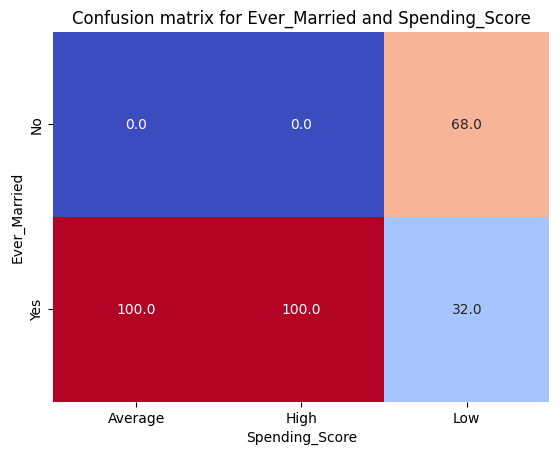

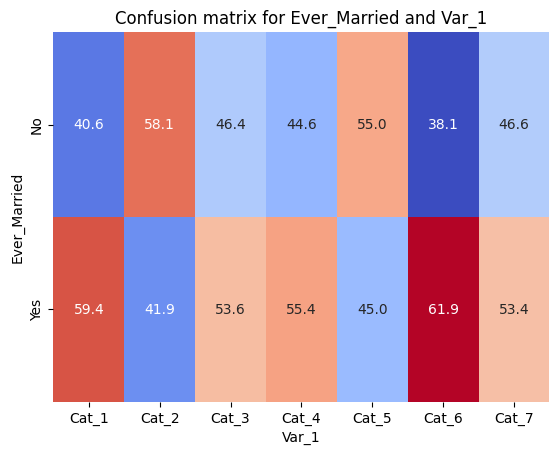

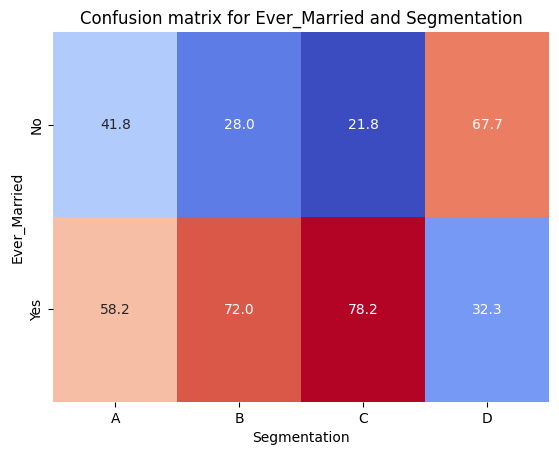

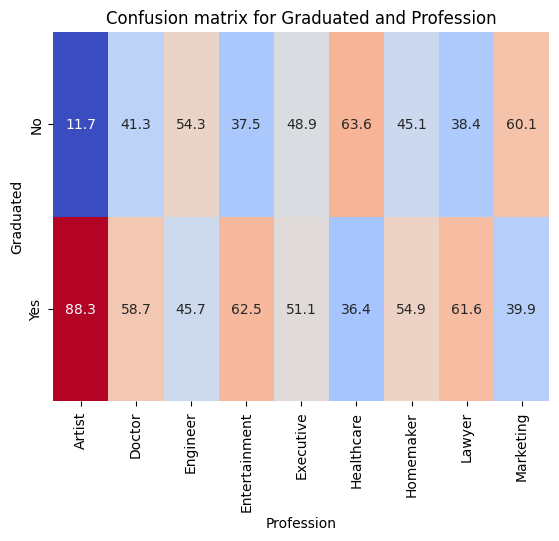

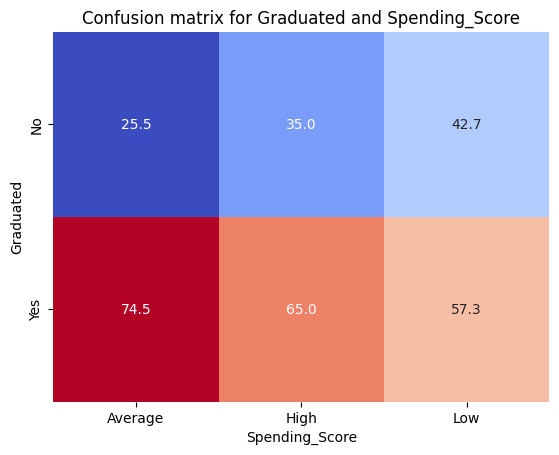

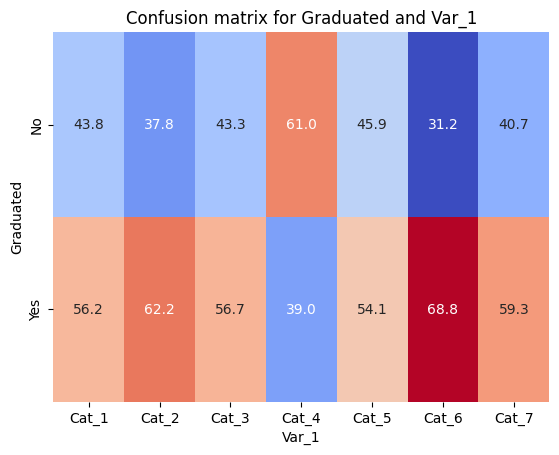

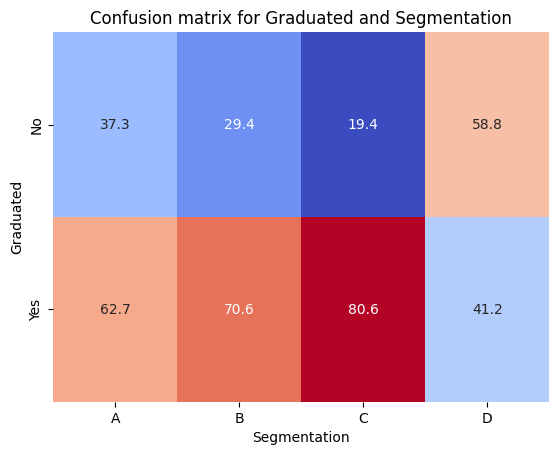

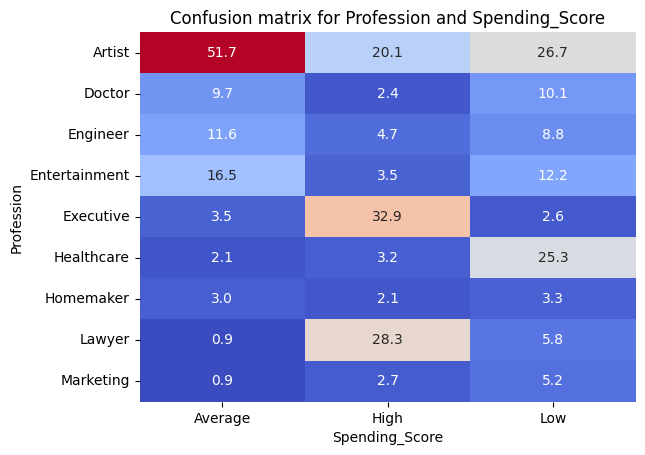

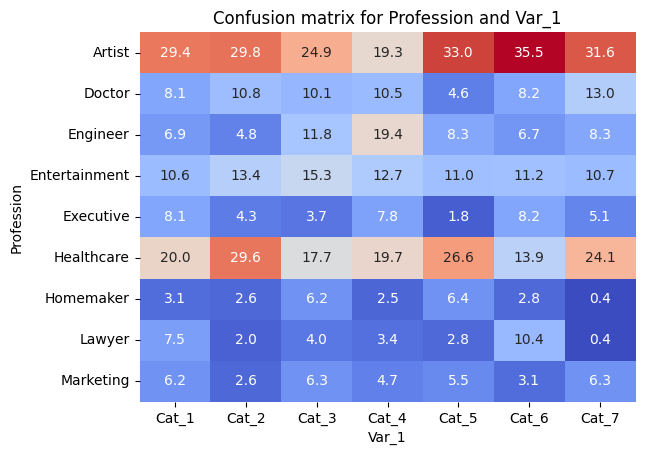

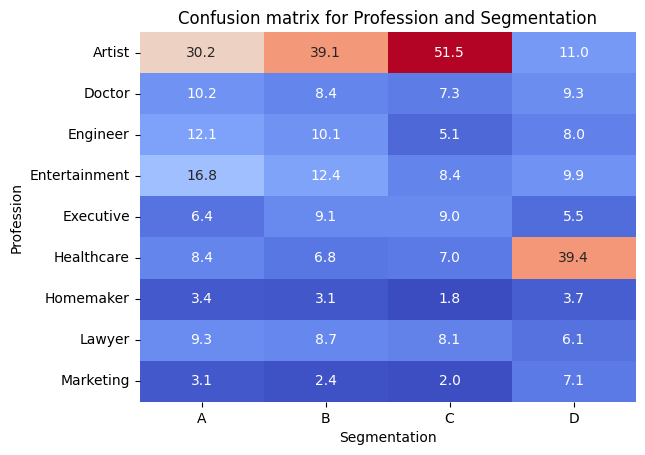

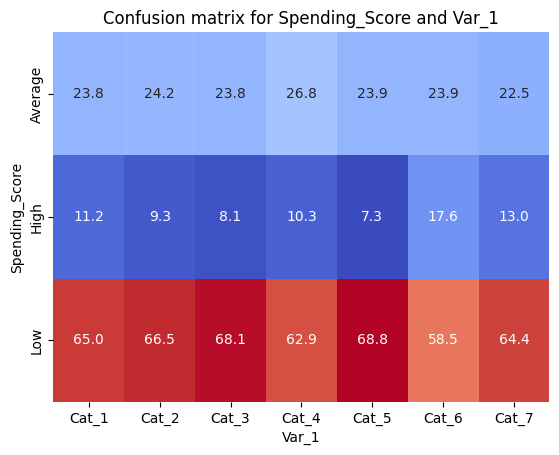

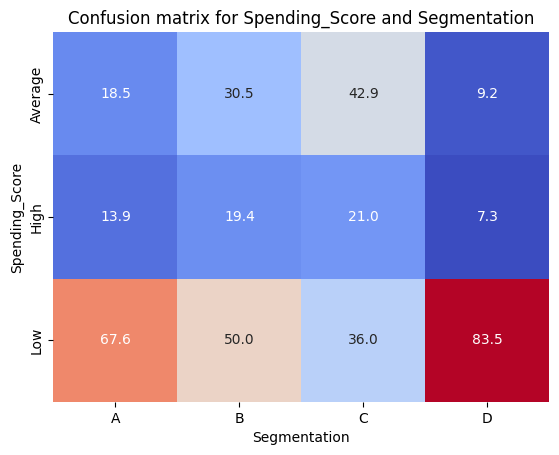

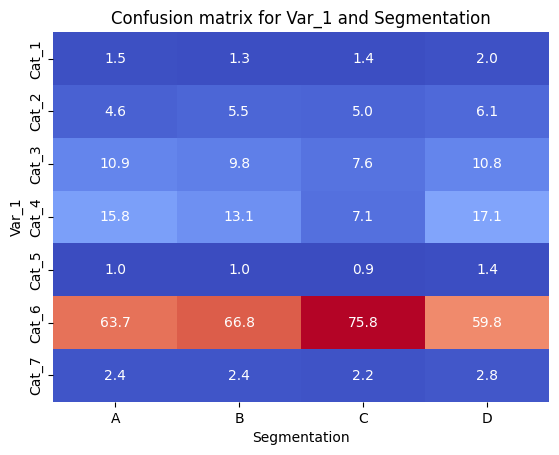

In [ ]:
import seaborn as sns

# Create list of categorical columns
cat_cols = ['Gender', 'Ever_Married', 'Graduated',
            'Profession', 'Spending_Score',
             'Var_1', 'Segmentation']

# Drop null values from categorical columns
data_without_na = data[cat_cols].dropna()

# Compute confusion matrix for all pairs of non-null categorical columns
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        col1 = cat_cols[i]
        col2 = cat_cols[j]
        ct = pd.crosstab(data_without_na[col1], data_without_na[col2])
        # Divide each cell in the matrix by the total count for that column
        ct_pct = ct.apply(lambda r: r/r.sum()*100, axis=0)
        sns.heatmap(ct_pct, cmap='coolwarm', annot=True, fmt='.1f', cbar=False)
        plt.title(f"Confusion matrix for {col1} and {col2}")
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.show()


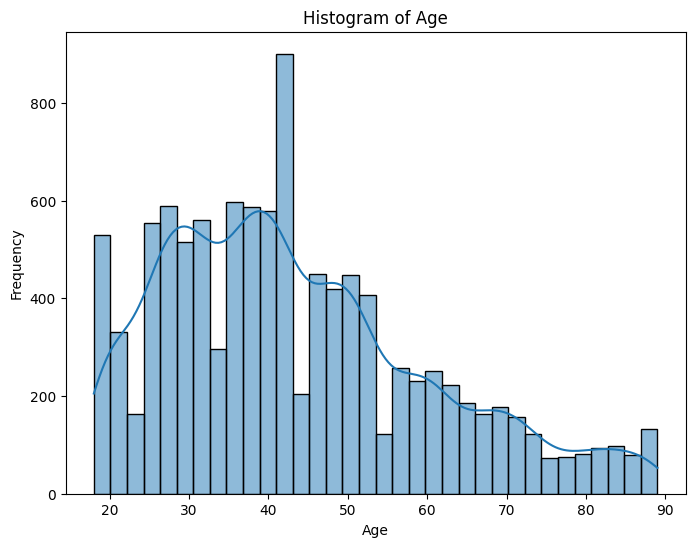

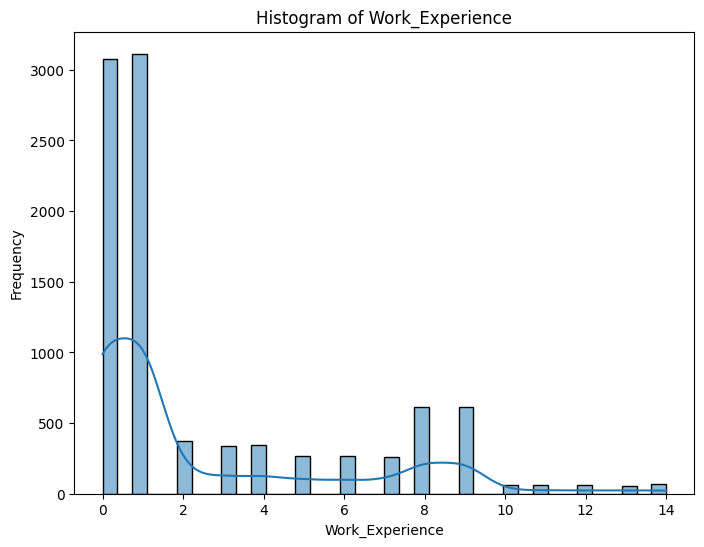

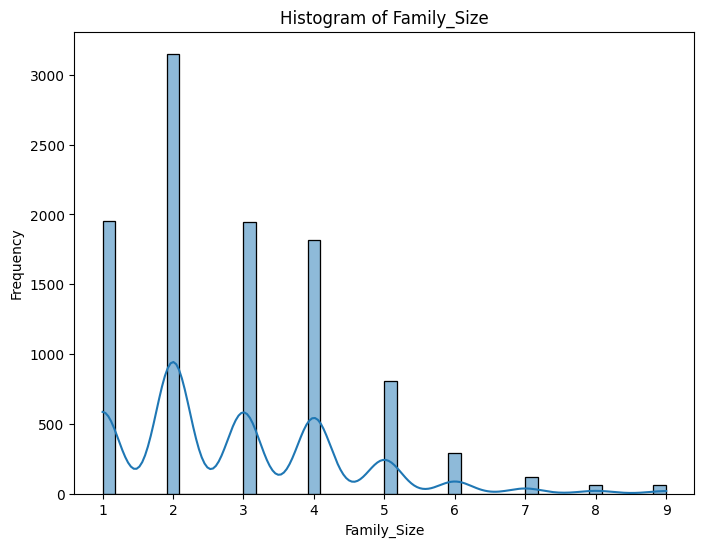

In [ ]:
# Create list of categorical columns
cat_cols = ['Age', 'Work_Experience', 'Family_Size']

for i in range(len(cat_cols)):
  # histogram
  plt.figure(figsize=(8, 6))
  sns.histplot(data[cat_cols[i]], kde=True)
  plt.xlabel(cat_cols[i])
  plt.ylabel('Frequency')
  plt.title('Histogram of ' + cat_cols[i])
  plt.show()

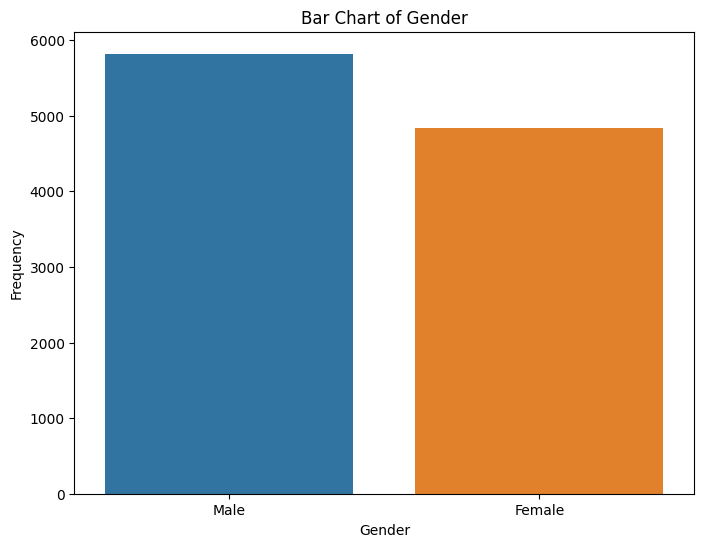

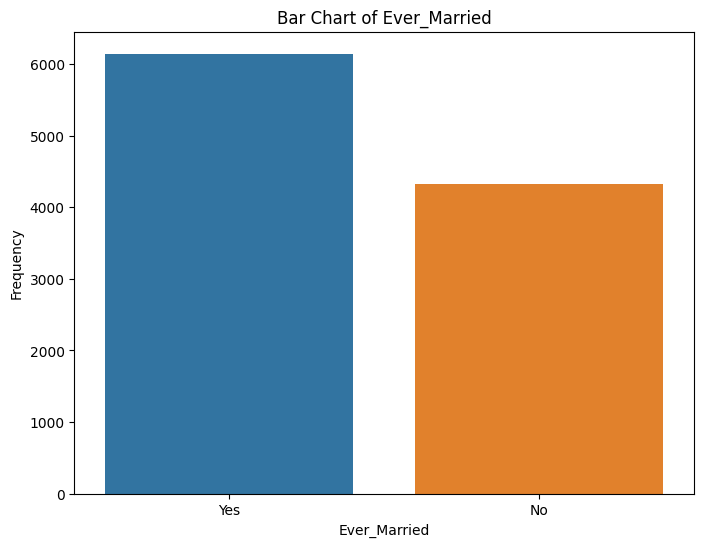

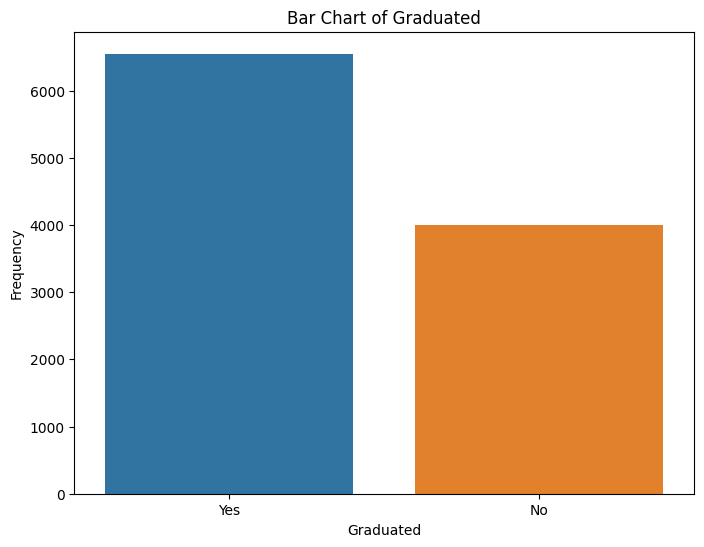

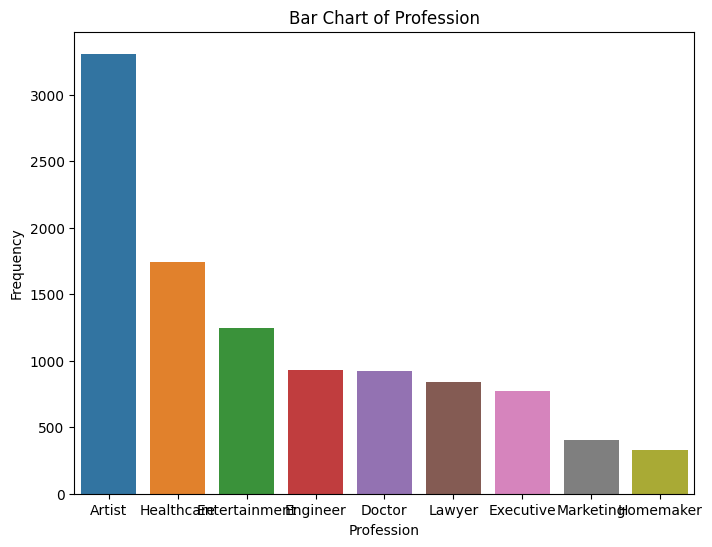

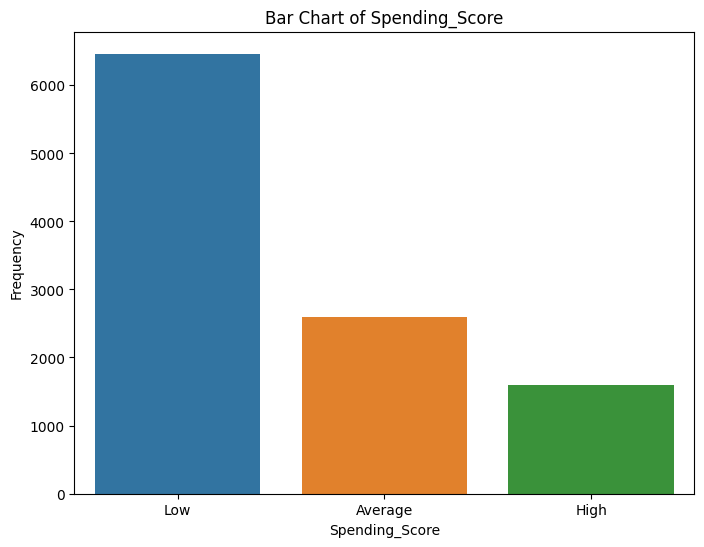

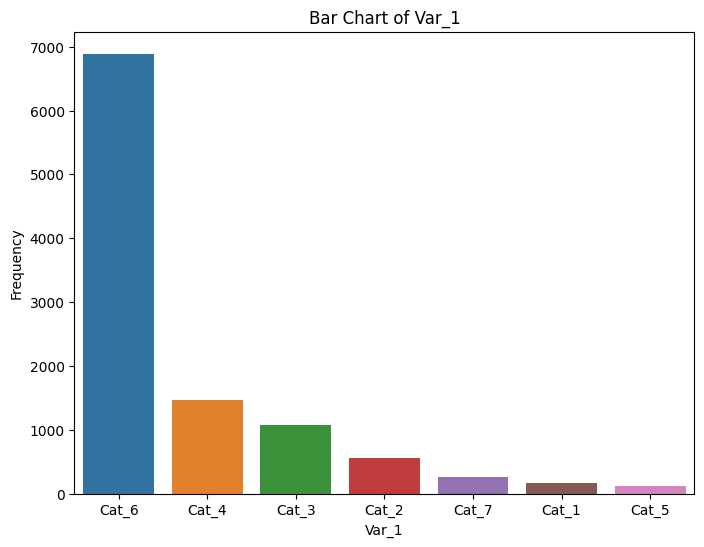

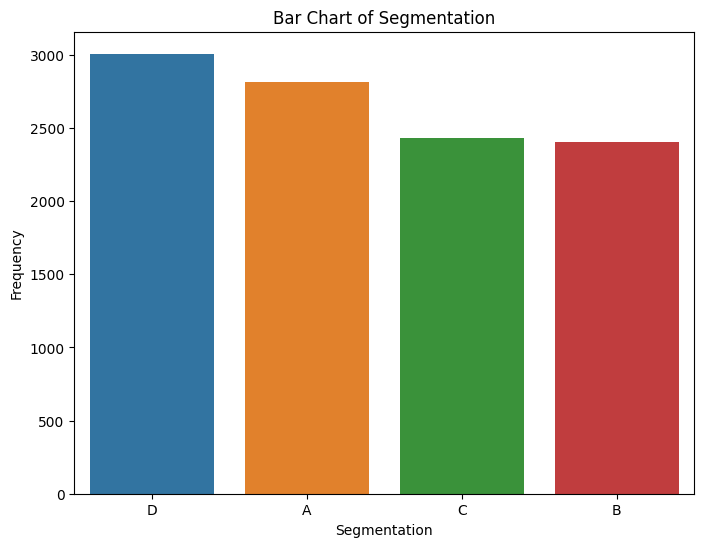

In [ ]:
# Create list of categorical columns
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

for i in range(len(cat_cols)):
  # bar chart for index attribute
  value_counts = data[cat_cols[i]].value_counts()
  plt.figure(figsize=(8, 6))
  sns.barplot(x=value_counts.index, y=value_counts.values)
  plt.xlabel(cat_cols[i])
  plt.ylabel('Frequency')
  plt.title('Bar Chart of ' + cat_cols[i])
  plt.show()

**Viewing Every correlated category in every column in order to fill nulls with the most likely to appear**

# **Data Cleaning**

In [ ]:
# Fill nulls in Ever_Married based on Spending_Score
data.loc[data['Spending_Score'] == 'High', 'Ever_Married'] = data.loc[data['Spending_Score'] == 'High', 'Ever_Married'].fillna('Yes')
data.loc[data['Spending_Score'] == 'Average', 'Ever_Married'] = data.loc[data['Spending_Score'] == 'Average', 'Ever_Married'].fillna('Yes')
data.loc[data['Spending_Score'] == 'Low', 'Ever_Married'] = data.loc[data['Spending_Score'] == 'Low', 'Ever_Married'].fillna('No')
# Fill nulls in Graduated based on Profession
data.loc[data['Profession'] == 'Artist', 'Graduated'] = data.loc[data['Profession'] == 'Artist', 'Graduated'].fillna('Yes')
data.loc[data['Profession'] != 'Artist', 'Graduated'] = data.loc[data['Profession'] != 'Artist', 'Graduated'].fillna('No')
data.loc[(data['Gender'] == 'Male') & (data['Profession'].isnull()), 'Profession'] = 'Executive'
data.loc[(data['Ever_Married'] == 'No') & (data['Profession'].isnull()), 'Profession'] = 'Healthcare'
data.loc[(data['Ever_Married'] == 'Yes') & (data['Profession'].isnull()), 'Profession'] = 'Lawyer'
data.loc[(data['Segmentation'] == 'C') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'
data.loc[(data['Graduated'] == 'Yes') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'
data.loc[(data['Spending_Score'] == 'Low') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_3'
data.loc[(data['Profession'] == 'Artist') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'
data.loc[(data['Gender'] == 'Female') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_5'
data.loc[(data['Ever_Married'] == 'Yes') & (data['Var_1'].isnull()), 'Var_1'] = 'Cat_6'

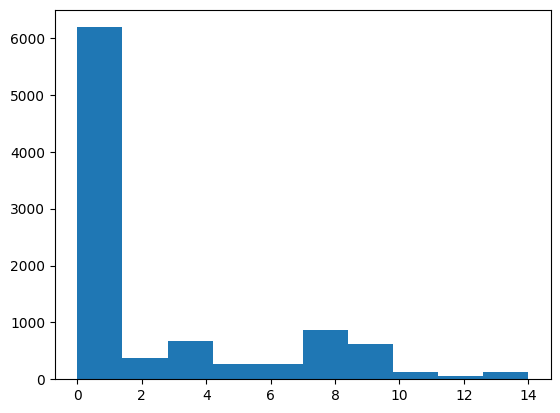

In [ ]:
plt.hist(data['Work_Experience'])
plt.show()

Very skewed then the median would be the best statistic to fill the nulls



In [ ]:
data['Work_Experience'].fillna(data['Work_Experience'].median(), inplace=True)
data['Family_Size'].fillna(data['Family_Size'].median(), inplace=True)

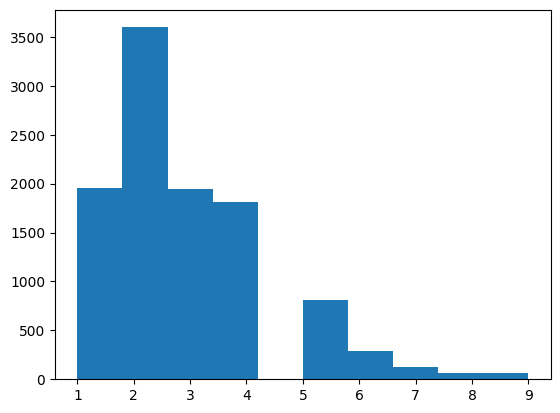

In [ ]:
plt.hist(data['Family_Size'])
plt.show()

Very skewed then the median would be the best statistic to fill the nulls

**now encode the categorical columns to apply ML models**

**After using the most correlated categories in columns to fill the nulls and the best statistic based on distribution for numerical columns now as shown there are no nulls anymore**

In [ ]:
data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## **Determine positive and negative**

In [ ]:
print(data[data['Family_Size'] >=4]['Segmentation'].value_counts())
print(data[data['Spending_Score'] == 'High']['Segmentation'].value_counts())
print(data[data['Graduated'] == 'Yes']['Segmentation'].value_counts())
print(data[data['Gender'] == 'Female']['Segmentation'].value_counts())
print(data[data['Age'] >30]['Segmentation'].value_counts())

# D: Spending_Score: Low, Family_Size: Big, No Graduated, Male, mostly under 30 years old => Negative
# C: Spending_Score: Very High, Family_Size: Big, mostly Graduated, Male, mostly older than 30 years => Positive
# B: Spending_Score: High, Family_Size: Big, mostly Graduated, Male, mostly older than 30 years => Positive
# A: Spending_Score: little Low, Family_Size: Small, mostly older than 30 years => Positive

D    1149
C     740
B     646
A     637
Name: Segmentation, dtype: int64
C    504
B    467
A    393
D    238
Name: Segmentation, dtype: int64
C    1934
A    1735
B    1688
D    1213
Name: Segmentation, dtype: int64
D    1309
A    1302
C    1145
B    1098
Name: Segmentation, dtype: int64
A    2253
C    2188
B    2115
D    1438
Name: Segmentation, dtype: int64


## **Encode the categorical columns to fit our data in ML models**

In [ ]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
data['Ever_Married'] = [1 if x == 'Yes' else 0 for x in data['Ever_Married']]
data['Graduated'] = [1 if x == 'Yes' else 0 for x in data['Graduated']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Profession'] = le.fit_transform(data['Profession'])
data['Spending_Score'] = le.fit_transform(data['Spending_Score'])
data['Var_1'] = le.fit_transform(data['Var_1'])
data['Segmentation'] = le.fit_transform(data['Segmentation'])

In [ ]:
data.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0,22,0,5,1.0,2,4.0,3,3
1,462643,1,1,38,1,2,1.0,0,3.0,3,0
2,466315,1,1,67,1,2,1.0,2,1.0,5,1
3,461735,0,1,67,1,7,0.0,1,2.0,5,1
4,462669,1,1,40,1,3,1.0,1,6.0,5,0
5,461319,0,1,56,0,0,0.0,0,2.0,5,2
6,460156,0,0,32,1,5,1.0,2,3.0,5,2
7,464347,1,0,33,1,5,1.0,2,3.0,5,3
8,465015,1,1,61,1,2,0.0,2,3.0,6,3
9,465176,1,1,55,1,0,1.0,0,4.0,5,2


# **Split Data**

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

x = data.drop(['Segmentation', 'ID'], axis=1)
y = data['Segmentation']

# scaler = StandardScaler()
# Xs = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# encoder = OneHotEncoder()

# X_train_array = np.array(X_train)
# y_train_array = np.array(y_train)
# X_test_array = np.array(X_test)
# y_test_array = np.array(y_test)

# y_train_onehot = encoder.fit_transform(y_train_array.reshape(-1, 1)).toarray()
# y_test_onehot = encoder.transform(y_test_array.reshape(-1, 1)).toarray()


## **Calculate accuracy**

In [ ]:
def calculate_precision(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    for i in range(0, y_true.size) :
      if (y_true[i]==2 and y_pred[i]==2) or (y_true[i]==1 and y_pred[i]==1) or (y_true[i]==0 and y_pred[i]==0):
        true_positive+=1
      elif (y_true[i]==3 and y_pred[i]!=3) :
        false_positive+=1
    precision = true_positive / (true_positive + false_positive)
    return precision

def calculate_recall(y_true, y_pred):
    true_positive = 0
    false_negative = 0
    for i in range(0, y_true.size) :
      if (y_true[i]==2 and y_pred[i]==2) or (y_true[i]==1 and y_pred[i]==1) or (y_true[i]==0 and y_pred[i]==0):
        true_positive+=1
      elif ( y_true[i]!=3 and y_pred[i]==3)  :
        false_negative+=1
    recall = true_positive / (true_positive + false_negative)
    return recall

def calculate_f1_score(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def calculate_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)

    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1

    accuracy = correct / total
    return accuracy

## **KNN**

In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        y_pred = []

        for x_test in X_test:
            distances = []

            for i, x_train in enumerate(self.X_train):
                distance = self.euclidean_distance(x_test, x_train)
                distances.append((distance, self.y_train[i]))

            distances.sort()
            k_nearest = distances[:self.k]
            labels = [label for (_, label) in k_nearest]
            unique_labels, counts = np.unique(labels, return_counts=True)
            y_pred.append(unique_labels[np.argmax(counts)])

        return y_pred


In [ ]:
# Create a KNN model with k=5
knn = KNN(k=5)

# Train the KNN model
knn.train(X_train, y_train)

# Make predictions on test data
predictions_knn = knn.predict(X_test)

In [ ]:
print("Precision: ", calculate_precision(y_test, predictions_knn))
print("Recall: ", calculate_recall(y_test, predictions_knn))
print("F1-score: ", calculate_f1_score(y_test, predictions_knn))
print("Accuracy:", calculate_accuracy(y_test, predictions_knn))

Precision:  0.6176165803108808
Recall:  0.8164383561643835
F1-score:  0.7032448377581121
Accuracy: 0.400562851782364


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Tính toán precision, recall và F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions_knn, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

accuracy = accuracy_score(y_test, predictions_knn)
print(f'Accuracy: {accuracy}')

Precision: 0.7593197746383904
Recall: 0.75187617260788
F1-score: 0.7513345091482735
Accuracy: 0.75187617260788


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)
predictions_knn = classifier.predict(X_test)

# Tính toán precision, recall và F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions_knn, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(f'Accuracy: {accuracy_score(y_test, predictions_knn)}')

Precision: 0.7719949688623869
Recall: 0.7659474671669794
F1-score: 0.7678391539000811
Accuracy: 0.7659474671669794


## **Random Forest**

In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.feature_indices = None
        self.split_feature = None
        self.split_value = None
        self.left_child = None
        self.right_child = None
        self.label = None

    def calculate_gini(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def split_data(self, data, labels, feature_index, split_value):
        left_indices = np.where(data[:, feature_index] <= split_value)[0]
        right_indices = np.where(data[:, feature_index] > split_value)[0]
        left_data, left_labels = data[left_indices], labels[left_indices]
        right_data, right_labels = data[right_indices], labels[right_indices]
        return left_data, left_labels, right_data, right_labels

    def find_best_split(self, data, labels):
        best_gini = 999999999
        best_feature_index = None
        best_split_value = None

        print("sadd: ", self.feature_indices)
        for feature_index in self.feature_indices:
            unique_values = np.unique(data[:, feature_index])
            for value in unique_values:
                left_data, left_labels, right_data, right_labels = self.split_data(data, labels, feature_index, value)
                if len(y[left_labels]) == 0 or len(y[left_labels]) == 0:
                    continue
                gini = (len(left_labels) * self.calculate_gini(left_labels) +
                        len(right_labels) * self.calculate_gini(right_labels)) / len(labels)
                # print('gini: ', gini)
                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_split_value = value

        print("best gini", best_gini)
        print("best_feature_index", best_feature_index)
        print("best_split_value ", best_split_value)
        return best_feature_index, best_split_value

    def build_tree(self, data, labels, depth):
        # if depth == self.max_depth or len(np.unique(labels)) == 1:
        #     self.label = max(set(labels), key=labels.tolist().count)
        #     return

        if depth == self.max_depth or len(np.unique(labels)) == 1:
            if len(labels) > 0:
                self.label = max(set(labels), key=labels.tolist().count)
                print("label: ", self.label)
            return
        self.feature_indices = np.random.choice(data.shape[1], int(np.sqrt(data.shape[1])), replace=False)
        self.split_feature, self.split_value = self.find_best_split(data, labels)
        left_data, left_labels, right_data, right_labels = self.split_data(data, labels,
                                                                          self.split_feature, self.split_value)

        self.left_child = DecisionTree(max_depth=self.max_depth)
        self.left_child.build_tree(left_data, left_labels, depth + 1)

        self.right_child = DecisionTree(max_depth=self.max_depth)
        self.right_child.build_tree(right_data, right_labels, depth + 1)

    def predict(self, x):
        if self.label is not None:
            print("label ", self.label)
            return self.label

        # if x[self.split_feature] <= self.split_value:
        # if x[self.split_feature] is not None and self.split_value is not None:
        if x[self.split_feature] is None: print("none")
        if self.split_value is None: print("None")
        if x[self.split_feature] <= self.split_value:
            return self.left_child.predict(x)
        else:
            return self.right_child.predict(x)


class RandomForest:
    def __init__(self, num_trees, max_depth=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.trees = []

    def build_forest(self, data, labels):
        i=0
        for _ in range(self.num_trees):
            i+=1
            print("i: ", i)
            tree = DecisionTree(max_depth=self.max_depth)
            bootstrap_indices = np.random.choice(len(data), len(data), replace=True)
            bootstrap_data, bootstrap_labels = data[bootstrap_indices], labels[bootstrap_indices]
            tree.build_tree(bootstrap_data, bootstrap_labels, depth=0)
            print("tree: ", tree.label)
            self.trees.append(tree)

    def predict(self, x):
        predictions = [tree.predict(x) for tree in self.trees]
        unique_labels, counts = np.unique(predictions, return_counts=True)
        return unique_labels[np.argmax(counts)]


In [ ]:
random_forest = RandomForest(num_trees=100, max_depth=5)

# Build the random forest model
random_forest.build_forest(X_train, y_train)

# Make predictions on test data
predictions = [random_forest.predict(x) for x in X_test]

print("Precision: ", calculate_precision(y_test, predictions))
print("Recall: ", calculate_recall(y_test, predictions))
print("F1-score: ", calculate_f1_score(y_test, predictions))
print("Accuracy:", calculate_accuracy(y_test, predictions))

Precision:  0.7290470723306545
Recall:  0.720771850170261
F1-score:  0.7248858447488584
Accuracy: 0.4812382739212008


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 20, max_depth=5)

#Train the model using the training sets 	y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)

print("Precision: ", calculate_precision(y_test, predictions))
print("Recall: ", calculate_recall(y_test, predictions))
print("F1-score: ", calculate_f1_score(y_test, predictions))
print("Accuracy:", calculate_accuracy(y_test, predictions))

Precision:  0.7307221542227662
Recall:  0.6753393665158371
F1-score:  0.7019400352733686
Accuracy: 0.4709193245778612


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.47654784240150094


In [ ]:
# 50 trees
print("Precision: ", calculate_precision(y_test, predictions))
print("Recall: ", calculate_recall(y_test, predictions))
print("F1-score: ", calculate_f1_score(y_test, predictions))
print("Accuracy:", calculate_accuracy(y_test, predictions))

Precision:  0.9828414550446122
Recall:  0.9972144846796658
F1-score:  0.9899758036640166
Accuracy: 0.9540337711069419


In [ ]:
# 50 trees
# completed in 6 seconds
print("Precision: ", calculate_precision(y_test, predictions))
print("Recall: ", calculate_recall(y_test, predictions))
print("F1-score: ", calculate_f1_score(y_test, predictions))
print("Accuracy:", calculate_accuracy(y_test, predictions))

Precision:  0.9784511784511785
Recall:  0.995887594242632
F1-score:  0.9870923913043478
Accuracy: 0.9606003752345216


In [ ]:
gender = int(input("Input gender: ")) # 0: male, 1: female
ever_married = int(input("Input married state: ")) # 0: No, 1: Yes
age = int(input("Input age: "))
graduate = int(input("Input graduate: ")) # 0: No, 1: Yes
profession = int(input("Input profession: ")) #  [     5            2        7           3            0         4          1         6           8      ]
                                              # ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive' 'Doctor' 'Homemaker' 'Marketing']
spending_score = int(input("Input spending score: ")) # 0: average, 1: high, 2: low
family_size = int(input("Input family size: "))
var_l = int(input("Input var_l: ")) # [3 5 6 2 0 1 4]

expl = [gender, ever_married, age, graduate, profession, spending_score, family_size, var_l]

print("predict: ", random_forest.predict(expl))

In [ ]:
expl = [[gender, ever_married, age, graduate, profession, spending_score, family_size, var_l]]

print("predict: ", random_forest.predict(expl))

## **Random Forest Using Entropy and Information Gain**

In [ ]:
import numpy as np

class DecisionTreeEntropy:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.feature_indices = None
        self.split_feature = None
        self.split_value = None
        self.left_child = None
        self.right_child = None
        self.label = None

    def calculate_entropy(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def split_data(self, data, labels, feature_index, split_value):
        left_indices = np.where(data[:, feature_index] <= split_value)[0]
        right_indices = np.where(data[:, feature_index] > split_value)[0]
        left_data, left_labels = data[left_indices], labels[left_indices]
        right_data, right_labels = data[right_indices], labels[right_indices]
        return left_data, left_labels, right_data, right_labels

    def find_best_split(self, data, labels):
        best_entropy = float('inf')
        best_feature_index = None
        best_split_value = None

        for feature_index in self.feature_indices:
            unique_values = np.unique(data[:, feature_index])
            for value in unique_values:
                left_data, left_labels, right_data, right_labels = self.split_data(data, labels, feature_index, value)
                entropy = np.sum(len(left_labels) * self.calculate_entropy(left_labels) +
                                len(right_labels) * self.calculate_entropy(right_labels)) / len(labels)
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature_index = feature_index
                    best_split_value = value

        return best_feature_index, best_split_value

    def build_tree(self, data, labels, depth):
        if depth == self.max_depth or len(np.unique(labels)) == 1:
            self.label = max(set(labels), key=labels.tolist().count)
            return

        self.feature_indices = np.random.choice(data.shape[1], int(np.sqrt(data.shape[1])), replace=False)
        self.split_feature, self.split_value = self.find_best_split(data, labels)
        left_data, left_labels, right_data, right_labels = self.split_data(data, labels,
                                                                          self.split_feature, self.split_value)

        self.left_child = DecisionTreeEntropy(max_depth=self.max_depth)
        self.left_child.build_tree(left_data, left_labels, depth + 1)

        self.right_child = DecisionTreeEntropy(max_depth=self.max_depth)
        self.right_child.build_tree(right_data, right_labels, depth + 1)

    def predict(self, x):
        if self.label is not None:
            return self.label

        if x[self.split_feature] <= self.split_value:
            return self.left_child.predict(x)
        else:
            return self.right_child.predict(x)


class RandomForestEntropy:
    def __init__(self, num_trees, max_depth=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.trees = []

    def build_forest(self, data, labels):
        for _ in range(self.num_trees):
            tree = DecisionTreeEntropy(max_depth=self.max_depth)
            bootstrap_indices = np.random.choice(len(data), len(data), replace=True)
            bootstrap_data, bootstrap_labels = data[bootstrap_indices], labels[bootstrap_indices]
            tree.build_tree(bootstrap_data, bootstrap_labels, depth=0)
            self.trees.append(tree)

    def predict(self, x):
        predictions = [tree.predict(x) for tree in self.trees]
        unique_labels, counts = np.unique(predictions, return_counts=True)
        return unique_labels[np.argmax(counts)]

In [ ]:
# Create a random forest model with 10 trees and maximum depth of 5
random_forest_entropy = RandomForestEntropy(num_trees=50, max_depth=5)

# Build the random forest model
random_forest_entropy.build_forest(X_train, y_train)

# Make predictions on test data
predictions_entropy = [random_forest.predict(x) for x in X_test]

# completed in 9 seconds

In [ ]:
print("Precision: ", calculate_precision(y_test, predictions_entropy))
print("Recall: ", calculate_recall(y_test, predictions_entropy))
print("F1-score: ", calculate_f1_score(y_test, predictions_entropy))
print("Accuracy:", calculate_accuracy(y_test, predictions_entropy))

Precision:  0.9862914862914863
Recall:  1.0
F1-score:  0.9930984380675627
Accuracy: 0.9263602251407129


## **Helu**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Tính toán precision, recall và F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Precision: 0.46733280703458174
Recall: 0.474671669793621
F1-score: 0.4681070760823497
Accuracy: 0.474671669793621


**seems like we are not very lucky with this data as it hard to get much higher accuracy but I'll do my best**